## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
# for numerical/scientific calculations
import numpy as np
# for data manipulation
import pandas as pd
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# for data preparation
# encoding
from sklearn.preprocessing import LabelEncoder
# scaling/normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# feature selection
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score

In [2]:
df=pd.read_csv('petrol.csv')

In [3]:
df

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [4]:
df.isna().sum()

tax             0
 income         0
 highway        0
 dl             0
 consumption    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
highway,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
dl,48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


# Here we can see that the data set is balenced

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

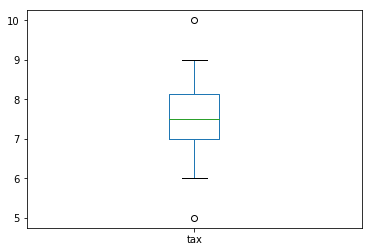

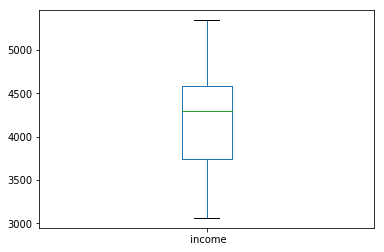

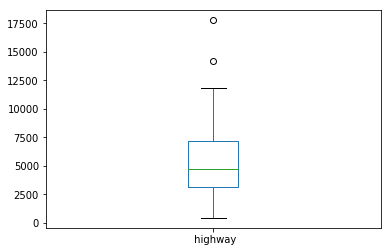

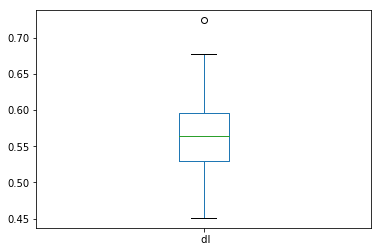

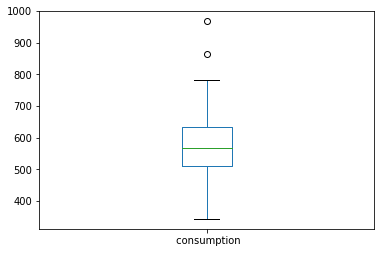

In [6]:
for i in df.columns: 
    df[i].plot(kind='box') 
    plt.show()

In [7]:

for outlier in df.columns:
    q1 = df[outlier].quantile(0.25)
    q3 = df[outlier].quantile(0.75)
    iqr = q3-q1
    a = q1-1.5*iqr
    b = q3+1.5*iqr
    df = df[df[outlier]>a]
    df = df[df[outlier]<b] 

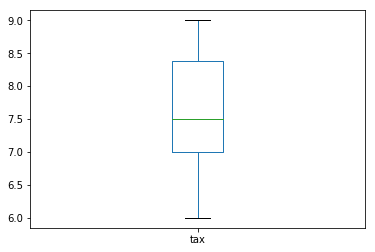

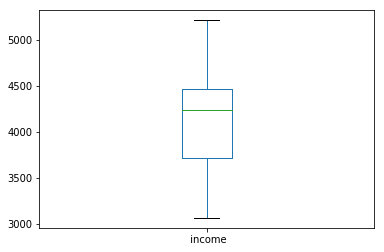

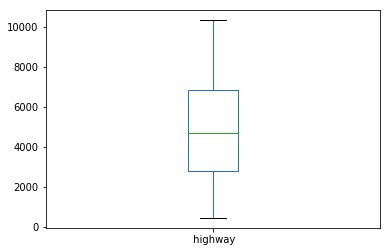

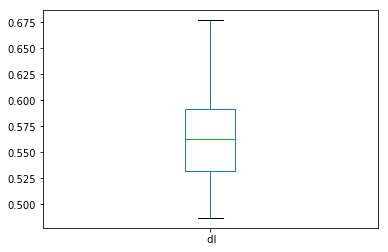

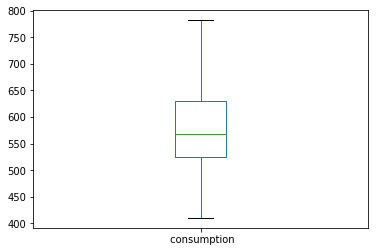

In [8]:
for i in df.columns: 
    df[i].plot(kind='box') 
    plt.show()

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [9]:
df.corr(method='kendall')


,tax,income,highway,dl,consumption
tax,1.000000,-0.078565,-0.346420,-0.269928,-0.352365
income,-0.078565,1.000000,-0.058106,0.213288,-0.196741
highway,-0.346420,-0.058106,1.000000,0.107289,0.149097
dl,-0.269928,0.213288,0.107289,1.000000,0.389019
consumption,-0.352365,-0.196741,0.149097,0.389019,1.000000


# Here we can see that all of them are less correlated to each other 

In [10]:
df.var().sort_values()

 dl             2.296881e-03
tax             7.035031e-01
 consumption    6.502244e+03
 income         2.867408e+05
 highway        6.775117e+06
dtype: float64

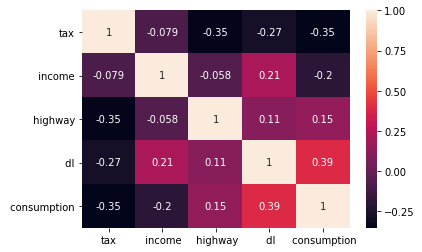

In [11]:
sns.heatmap(df.corr(method='kendall'),annot=True)

# Here we used kendall because it is a small dataset 

# We can conclude that dl is positively corr with consumption and tax is negatively corr with it 

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [12]:
X=df[['tax', ' income', ' highway', ' dl']]
y=df[' consumption']

# Here we chose Highway , income because they had high variences and tax ,dl because  of corr  again at the same time we can say that income of user impacts the fuel consumption , tax:- how much tax is deducted from his income

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [15]:
print(X_train.shape,X_test.shape) 
print(y_train.shape,y_test.shape)

(33, 4) (9, 4)
(33,) (9,)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train) 
coff=pd.DataFrame(model.coef_,columns=['coefficients']) 
coff['X.Columns']=df.columns.drop(' consumption') 
coff

,coefficients,X.Columns
0,-29.137117,tax
1,-0.079890,income
2,-0.000141,highway
3,771.824816,dl


# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [17]:
model.score(X_test,y_test)

0.4911583951313845

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features. Find R2 Score


In [18]:
features=df[[' highway',' income']]
target=df[' consumption']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=88)

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
model.score(X_test,y_test)

0.2556011164890377

In [22]:
mse = mean_squared_error(model.predict(X_test), y_test)
print(mse)
rmse = np.sqrt(mse)
print(rmse) 

1431.249300249756
37.83185562789322


# Question 9: Print the coefficients of the multilinear regression model

In [23]:
model.coef_

array([ 0.00762088, -0.02470913])

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer